# <span style="color:#54B1FF">Classification:</span> &nbsp; <span style="color:#1B3EA9"><b>Validation</b></span>

<br>

In most machine learning problems, only performance on the **test set** matters.

Why?

Consider an analogy:

* Imagine that you are constructing a machine learning algorithm to drive a car (i.e., without a human driver)
* Now imagine that you train your algorithm on 1 hour of highway features (e.g., video feeds, other sensor feeds)
* Now imagine that your algorithm performs with an accuracy of 100% (i.e., it always breaks when it should break, acclerates when it should accelerate, and changes lanes when it should change lanes)
* Is this 1 hour of training data sufficient to let your algorithm drive a car on a real highway?  **Probably not.**
* Is this 1 hour of highway training data sufficient to let your algorithm drive a car in a city?  **Almost certainly not**


From this example, it is clear that **test set** performance (e.g., real-world driving safety) is much more important than **training set** performance.

How can one balance training- and test-set performance?

<br>

<a name="toc"></a>
# Table of Contents

* [Balancing training- and test-set classification rates](#balancing)
* [Summary](#summary)


___

<a name="balancing"></a>
# Balancing training- and test-set classification rates (CRs)
[Back to Table of Contents](#toc)

<br>

A key consideration in all supervised learning is: balance between training CR and test set CR.

In general, complex classifiers like neural networks can be easily adjusted to achieve CR=100%, even when the data are poorly separated, as shown in the figure above.  However, higher training-set CR is not necessarily good, because it generally means lower test-set CR. This is called **over-fitting**. Over-fitting refers to overly complex decision surface geomtery that performs poorly on test sets.

Below an example of balancing example is shown.

<br>
<br>

Let's first import the packages and functions we'll need in this notebook:

<br>
<br>



In [1]:

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


<br>
<br>

Let's re-build the dataset from the previous notebook:

<br>
<br>

Data shape:    (100, 2)
Labels shape:  (100,)


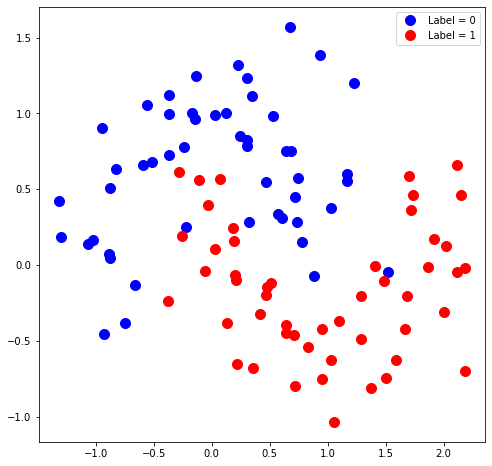

In [2]:

x,labels = make_moons(noise=0.3, random_state=0)

print( f'Data shape:    {x.shape}'  )
print( f'Labels shape:  {labels.shape}'  )


plt.figure(figsize=(8,8))
ax = plt.axes()
x0 = x[labels==0]
x1 = x[labels==1]
ax.plot( x0[:,0], x0[:,1], 'bo', ms=10, label='Label = 0' )
ax.plot( x1[:,0], x1[:,1], 'ro', ms=10, label='Label = 1' )
ax.legend()
plt.show()    


<br>
<br>

The first steps is to separate the data into training and test sets. The `train_test_split` function is very convenient for this purpose;  it randomly assigns observations (and their labels) to training and test groups.

<br>
<br>

In [3]:


x_train, x_test, labels_train, labels_test = train_test_split(x, labels, test_size=0.33, random_state=1)

print( f'Training data shape:    {x_train.shape}'  )
print( f'Test data shape:        {x_test.shape}'  )
print( f'Training labels shape:  {labels_train.shape}'  )
print( f'Test labels shape:      {labels_test.shape}'  )


Training data shape:    (67, 2)
Test data shape:        (33, 2)
Training labels shape:  (67,)
Test labels shape:      (33,)


<br>
<br>

Note that `test_size=0.33` implies that 1/3 of the observations will be used in the test set.

<br>
<br>

Let's fit a complex ANN classifier to the training data, then check its performance on both the training and test data.

<br>
<br>



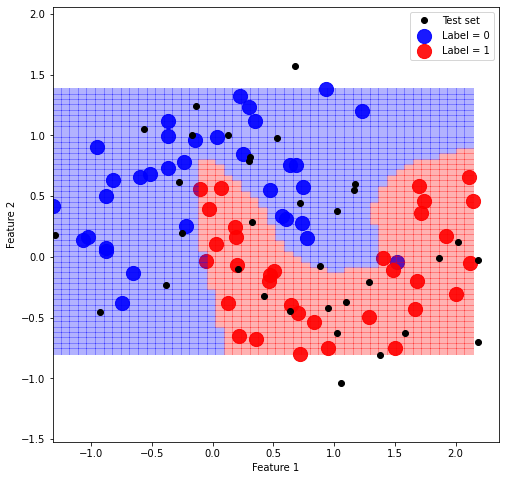

In [4]:

def plot_decision_surface(classifier, x, labels, ax=None, colors=None, n=50, alpha=0.3, marker_size=200, marker_alpha=0.9):
    nlabels   = np.unique( labels ).size
    colors    = plt.cm.viridis( np.linspace(0,1,nlabels) )  if (colors is None) else colors
    ax        = plt.gca() if (ax is None) else ax
    xmin,xmax = x.min(axis=0), x.max(axis=0)
    Xp,Yp     = np.meshgrid( np.linspace(xmin[0],xmax[0],n) , np.linspace(xmin[1],xmax[1],n) )
    xp        = np.vstack( [Xp.flatten(), Yp.flatten()] ).T
    labelsp   = classifier.predict(xp)
    Labelsp   = np.reshape(labelsp, Xp.shape)
    cmap      = ListedColormap(colors)
    for i,label in enumerate( np.unique(labels) ):
        xx   = x[labels==label]
        ax.scatter( xx[:,0], xx[:,1], color=colors[i], s=marker_size, alpha=marker_alpha, label=f'Label = {label}' )
    plt.pcolormesh(Xp, Yp, Labelsp, cmap=cmap, alpha=alpha)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.axis('equal')
    ax.legend()
    

# create and train a classifier:
mlp    = MLPClassifier(solver='lbfgs', alpha=0.0001, hidden_layer_sizes=(50, 20), random_state=0)
mlp.fit(x_train, labels_train)


# plot the decision surface:
plt.figure(figsize=(8,8))
plot_decision_surface(mlp, x_train, labels_train, colors=['b','r'])
plt.plot(x_test[:,0], x_test[:,1], 'ko', label='Test set')
plt.legend()
plt.show()


<br>
<br>

How does our trained classifier perform on the training and test sets?

<br>
<br>


In [5]:
# calculate the CRs for the training and test sets":
labels_pred_train = mlp.predict(x_train)
labels_pred_test  = mlp.predict(x_test)
cr_train          = accuracy_score(labels_train, labels_pred_train)
cr_test           = accuracy_score(labels_test, labels_pred_test)
print( f'Classification rate (training) = {cr_train}' )
print( f'Classification rate (test)     = {cr_test}' )



Classification rate (training) = 0.9850746268656716
Classification rate (test)     = 0.8787878787878788


<br>
<br>

Note that the training set CR is much higher than the test set CR.  This generally indicates over-fitting.

Next let's use a higher `alpha` value to reduce the complexity of the decision surface, and check the CR effects.

<br>
<br>

Classification rate (training) = 0.835820895522388
Classification rate (test)     = 0.8181818181818182


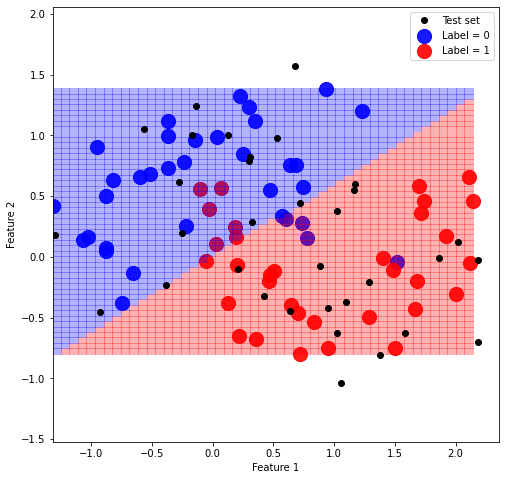

In [6]:

# create and train a classifier:
mlp    = MLPClassifier(solver='lbfgs', alpha=3, hidden_layer_sizes=(50, 20), random_state=0)
mlp.fit(x_train, labels_train)


# calculate the CRs for the training and test sets":
labels_pred_train = mlp.predict(x_train)
labels_pred_test  = mlp.predict(x_test)
cr_train          = accuracy_score(labels_train, labels_pred_train)
cr_test           = accuracy_score(labels_test, labels_pred_test)
print( f'Classification rate (training) = {cr_train}' )
print( f'Classification rate (test)     = {cr_test}' )


# plot the decision surface:
plt.figure(figsize=(8,8))
plot_decision_surface(mlp, x_train, labels_train, colors=['b','r'])
plt.plot(x_test[:,0], x_test[:,1], 'ko', label='Test set')
plt.legend()
plt.show()



<br>
<br>

The decision surface geometry is now simple, but the CRs are considerably lower than for the complex surface.

<br>
<br>

So how do we know what `alpha` value should be used?

One way is to repeat analyses for a large number of random training/test sets for a variety of different `alpha` values, then plot the overall CR performance.

The cell below demonstrates one way to do this.

<br>
<br>

⚠️ **Warning!** &nbsp; &nbsp; The cell below will take a long time to run (more than 1 minute if your computer is slow!).  To reduce the calculation time, set `niter` to a smaller value, like 5. 

⚠️ **Hanging cell** : &nbsp; &nbsp; If the cell hangs (i.e., doesn't complete execution), select **Kernel.. Interrupt** from the menu bar to stop execution.


<br>
<br>



In [7]:
import warnings
warnings.filterwarnings('ignore')   # this will suppress warning from sklearn

ALPHA   = [0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1, 2, 3, 5]
niter   = 50   # number of iterations for each ALPHA value

np.random.seed(0)

CR      = []
for alpha in ALPHA:
    cr  = []
    for i in range(niter):
        x_train, x_test, labels_train, labels_test = train_test_split(x, labels, test_size=0.33)
        mlp    = MLPClassifier(solver='lbfgs', alpha=alpha, hidden_layer_sizes=(50, 20), max_iter=1000)
        mlp.fit(x_train, labels_train)
        labels_pred_test  = mlp.predict(x_test)
        cr_test           = accuracy_score(labels_test, labels_pred_test)
        cr.append( cr_test )
    CR.append( cr )

CR      = np.array(CR)


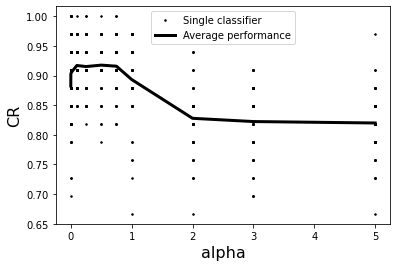

In [8]:
plt.figure()
ax = plt.axes()
h0 = ax.plot(ALPHA, CR, 'k.', ms=3)[0]
h1 = ax.plot(ALPHA, CR.mean(axis=1), 'k-', lw=3, label='Average CR')[0]
ax.legend([h0,h1], ['Single classifier', 'Average performance'])
ax.set_xlabel('alpha', size=16)
ax.set_ylabel('CR', size=16)
plt.show()

<br>
<br>

These results suggest that:

* This classifier yields a maximum average test set CR of approximately 92%.
* The optimum `alpha` value for this classifier (that maximizes the test set CR) is approximately 0.5.
* Other `alpha` values between approximately 0.01 and 0.75 do not greatly affect the average CR.

<br>
<br>

<br>

___
<a name="summary"></a>
# Summary
[Back to Table of Contents](#toc)

* Greater classifier complexity (i.e., greater decision surface complexity) generally produces higher training set CRs, but lower test set CRs.
* To find the optimum parameters for a neural network classifier (and other classifiers), systematically vary the parameters and check the CRs for a **large number of randomly selected training and test sets**.

